In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D ,Dense,Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#Load Dataset
X_train=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/input.csv', delimiter =',')
Y_train=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/labels.csv',delimiter =',')
X_test=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/input_test.csv',delimiter =',')
Y_test=np.loadtxt('C:/Users/priti/Desktop/Assignment_3/labels_test.csv', delimiter =',')

In [63]:
#Reshaping appropriate size..removing comma
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train= Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test= Y_test.reshape(len(Y_test),1)

In [64]:
print("Shape of X_train:", X_train.shape) #2000 train images 400 given for testing
print("Shape of Y_train:", Y_train.shape) #imagesize is(100*100)pixels*3RGB Channels
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [65]:
X_train[1]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [66]:
#Feature Scaling rescale to 0 and 1
X_train=X_train/255.0
X_test = X_test/255.0


In [67]:
X_train[1]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

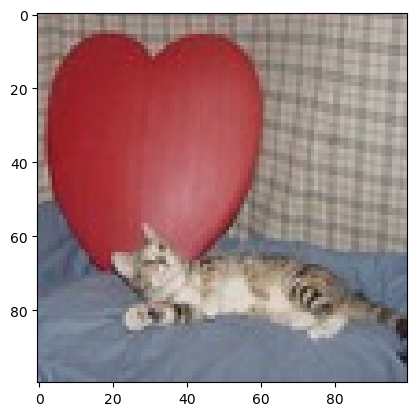

In [70]:
#display image
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [71]:
#Model Building
model = Sequential([                           #layers are in seq..cnv..max..con
    Conv2D(32, (3,3), activation ='relu', input_shape = (100,100,3)),#filter,filter size height and width,input shape for first layer
    MaxPooling2D((2,2)),    #filtersize 
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'), # 64 number of neurons we want in that layer
    Dense(1,activation ='sigmoid') #we want only 1 Output as it is binary..binary so Sigmoid
])

In [72]:
#2 ways of defining model
model= Sequential()
model.add(Conv2D(32, (3,3), activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation ='sigmoid'))

In [73]:
model.compile(loss='binary_crossentropy',optimizer ='adam', metrics =['accuracy'])

In [74]:
model.fit(X_train,Y_train,epochs=7, batch_size =64 )

Epoch 1/7
32/32 [==============================] - 11s 127ms/step - loss: 0.7208 - accuracy: 0.5185
Epoch 2/7
32/32 [==============================] - 4s 119ms/step - loss: 0.6872 - accuracy: 0.5345
Epoch 3/7
32/32 [==============================] - 4s 115ms/step - loss: 0.6635 - accuracy: 0.6310
Epoch 4/7
32/32 [==============================] - 4s 113ms/step - loss: 0.6067 - accuracy: 0.6725
Epoch 5/7
32/32 [==============================] - 4s 119ms/step - loss: 0.5538 - accuracy: 0.7140
Epoch 6/7
32/32 [==============================] - 4s 126ms/step - loss: 0.5006 - accuracy: 0.7620
Epoch 7/7
32/32 [==============================] - 4s 124ms/step - loss: 0.4426 - accuracy: 0.7955


In [44]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 36ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931498050689697, 0.5]

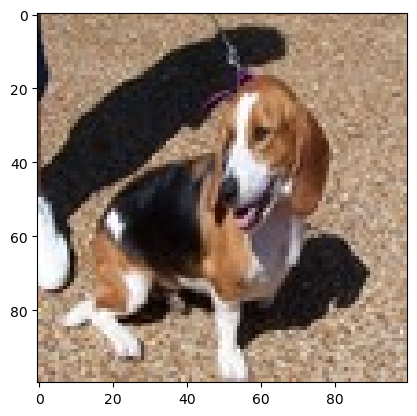

1/1 [==============================] - 0s 19ms/step
[[0.19490229]]
Our model says it is a: dog


In [84]:
#Making Predictions
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred>0.5

if(y_pred == 0):
    pred ='dog'
else:
    pred='cat'
print("Our model says it is a:", pred)
